## LGMVIP Feb 22
## Rahul Netkar
### **Task 4: Develop A Neural Network That Can Read Handwriting**
### Dataset: MNIST

- ### Importing needed libraries

In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt

- ### Loading dataset

In [2]:
mnist = tf.keras.datasets.mnist

- ### Splitting data into train-test split.
- ### Reshaping and normalizing

In [3]:
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Reshaping the image array
training_images=training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

# normalizing values between 0 - 1
training_images = tf.keras.utils.normalize(training_images, axis=1)
test_images = tf.keras.utils.normalize(test_images, axis=1)

In [5]:
print(training_images[1])

[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

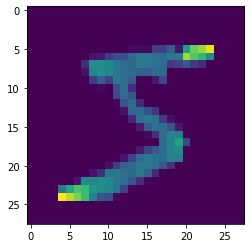

In [18]:
plt.imshow(training_images[0])
plt.show()

- ### Defining model and training

In [13]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.99):
      print("\nReached 99.8% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()

In [14]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 21s 11ms/step - loss: 0.1914 - accuracy: 0.9429
Epoch 2/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0677 - accuracy: 0.9797
Epoch 3/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0456 - accuracy: 0.9855
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0317 - accuracy: 0.9900
Epoch 5/10
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0228 - accuracy: 0.9927

Reached 99.8% accuracy so cancelling training!


- ### Evaluating the model

In [12]:
val_loss, val_acc = model.evaluate(test_images, test_labels)
print("Validation accuracy: ", val_acc)
print("Validation loss: ", val_loss)

313/313 [==============================] - 1s 3ms/step - loss: 0.0776 - accuracy: 0.9800
Validation accuracy:  0.9800000190734863
Validation loss:  0.07757385820150375


- ### Saving the model

In [15]:
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [16]:
new_model = tf.keras.models.load_model('num_reader.model')

- ### Making predictions

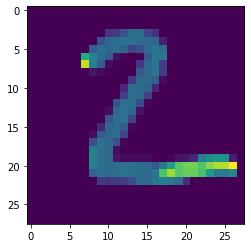

In [28]:
plt.imshow(test_images[1])
plt.show()

In [20]:
prediction = new_model.predict([test_images])

In [29]:
import numpy as np
print("Predicted number is:", np.argmax(prediction[1]))

Predicted number is: 2


## Thank you